# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Valeria Guzmán Galván |
| **Fecha**      | 03/02/2026  |
| **Expediente** | 756902  |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,radio,newspaper,sales\n1,230.1,37.8,69.2,22.1\n2,44.5,39.3,45.1,10.4\n3,17.2,45.9,69.3,9.3\n4,151.5,41.3,58.5,18.5\n5,180.8,10.8,58.4,12.9\n6,8.7,48.9,75,7.2\n7,57.5,32.8,23.5,11.8\n8,120.2,19.6,11.6,13.2\n9,8.6,2.1,1,4.8\n10,199.8,2.6,21.2,10.6\n11,66.1,5.8,24.2,8.6\n12,214.7,24,4,17.4\n13,23.8,35.1,65.9,9.2\n14,97.5,7.6,7.2,9.7\n15,204.1,32.9,46,19\n16,195.4,47.7,52.9,22.4\n17,67.8,36.6,114,12.5\n18,281.4,39.6,55.8,24.4\n19,69.2,20.5,18.3,11.3\n20,147.3,23.9,19.1,14.6\n21,218.4,27.7,53.4,18\n22,237.4,5.1,23.5,12.5\n23,13.2,15.9,49.6,5.6\n24,228.3,16.9,26.2,15.5\n25,62.3,12.6,18.3,9.7\n26,262.9,3.5,19.5,12\n27,142.9,29.3,12.6,15\n28,240.1,16.7,22.9,15.9\n29,248.8,27.1,22.9,18.9\n30,70.6,16,40.8,10.5\n31,292.9,28.3,43.2,21.4\n32,112.9,17.4,38.6,11.9\n33,97.2,1.5,30,9.6\n34,265.6,20,0.3,17.4\n35,95.7,1.4,7.4,9.5\n36,290.7,4.1,8.5,12.8\n37,266.9,43.8,5,25.4\n38,74.7,49.4,45.7,14.7\n39,43.1,26.7,35.1,10.1\n40,228,37.7,32,21.5\n41,202.5,22.3,31.6,16.6\n42,177,33.4

In [4]:
df = pd.read_csv("Advertising.csv", sep=",")
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

A partir de las gráficas se observa que existe una relación positiva entre el presupuesto destinado a TV y radio con las ventas, ya que conforme aumenta la inversión en estos medios, las ventas tienden a incrementarse de manera clara. En ambos casos se aprecia una tendencia ascendente bien definida.

Por otro lado, en el caso del periódico, la relación con las ventas es mucho más débil, ya que los puntos se encuentran dispersos y no muestran una tendencia clara. Esto sugiere que la publicidad en periódico tiene menor impacto en las ventas en comparación con TV y radio.

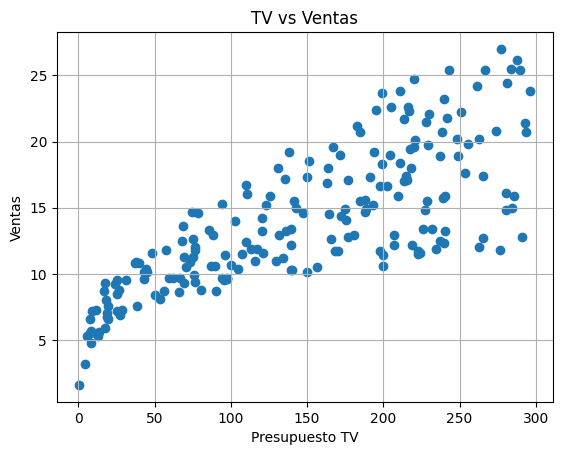

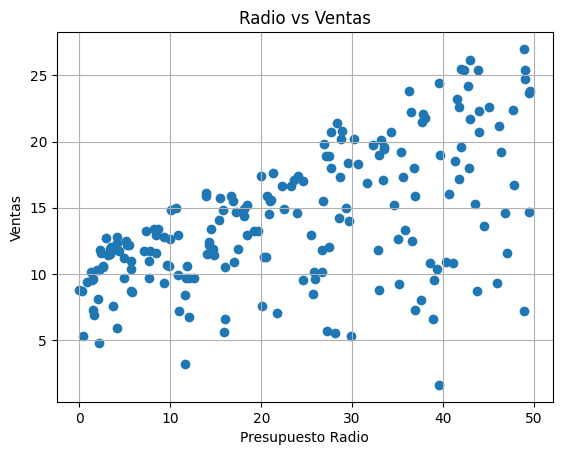

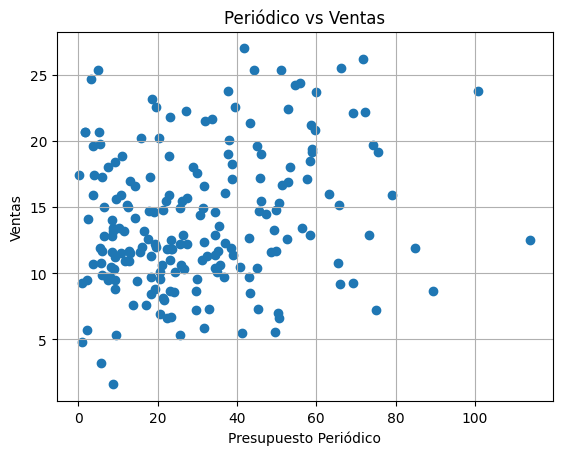

In [5]:
# TV vs Ventas
plt.figure()
plt.scatter(df["TV"], df["sales"])
plt.xlabel("Presupuesto TV")
plt.ylabel("Ventas")
plt.title("TV vs Ventas")
plt.grid()
plt.show()

# Radio vs Ventas
plt.figure()
plt.scatter(df["radio"], df["sales"])
plt.xlabel("Presupuesto Radio")
plt.ylabel("Ventas")
plt.title("Radio vs Ventas")
plt.grid()
plt.show()

# Periódico vs Ventas
plt.figure()
plt.scatter(df["newspaper"], df["sales"])
plt.xlabel("Presupuesto Periódico")
plt.ylabel("Ventas")
plt.title("Periódico vs Ventas")
plt.grid()
plt.show()

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

La relación entre el presupuesto de publicidad y las ventas es fuerte para TV y radio, ya que al aumentar la inversión en estos medios, las ventas tienden a incrementarse. Esto indica que invertir en publicidad sí tiene un impacto en las ventas y puede ayudar a explicar su comportamiento.

En el caso del periódico, la relación es más débil, por lo que su impacto en las ventas parece ser menor.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [6]:
X = df["TV"].values.reshape(-1,1)
y = df["sales"].values

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
b0 = lr.intercept_
b1 = lr.coef_

print(f"Ventas = {b0} + {b1[0]} * TV")

Ventas = 7.032593549127695 + 0.04753664043301975 * TV


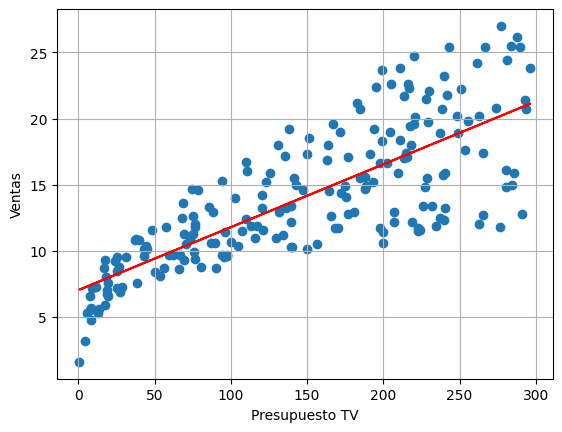

In [15]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Presupuesto TV")
plt.ylabel("Ventas")
plt.grid()
plt.show()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población es el conjunto completo de todos los datos que nos interesan estudiar.

La muestra es solo una parte de esa población que usamos para analizar y hacer estimaciones. Los coeficientes que calculamos con la muestra son aproximaciones de los verdaderos valores de la población.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Hacer una regresión con todos los datos de la población permite obtener los valores reales de los coeficientes, sin error de muestreo. En cambio, al hacer una regresión con una muestra, los coeficientes son estimaciones que pueden variar dependiendo de la muestra utilizada, aunque suelen aproximar bien a los valores reales si la muestra es representativa.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [16]:
n = len(X)
p = 2

In [20]:
y_pred = lr.predict(X)
residuos = y - y_pred

In [21]:
RSS = np.sum(residuos**2)
sigma2 = RSS / (n - p)

In [22]:
x_bar = np.mean(X)
aux = np.sum((X - x_bar)**2)

In [23]:
SE_b1 = np.sqrt(sigma2 / aux)
SE_b0 = np.sqrt(sigma2 * (1/n + x_bar**2 / aux))

print("Error estándar de beta0:", SE_b0)
print("Error estándar de beta1:", SE_b1)

Error estándar de beta0: 0.4578429402734785
Error estándar de beta1: 0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [25]:
# Intervalo de confianza para beta0
b0_inf = b0 - 2*SE_b0
b0_sup = b0 + 2*SE_b0

print("IC 95% para beta0: [", b0_inf, ",", b0_sup, "]")

IC 95% para beta0: [ 6.116907668580738 , 7.948279429674652 ]


In [29]:
# Intervalo de confianza para beta1
b1_inf = b1 - 2*SE_b1
b1_sup = b1 + 2*SE_b1

print("IC 95% para beta0:", b1_inf, ",", b1_sup)

IC 95% para beta0: [0.04215543] , [0.05291785]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipótesis nula establece que no existe relación entre X y Y, es decir, que los cambios en X no influyen en el valor de Y.

La hipótesis alternativa establece que sí existe una relación entre X y Y, lo que significa que los cambios en X sí tienen un efecto sobre Y.

Para probar la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero.

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [33]:
# Estadístico t para beta0
t_b0 = (b0 - 0) / SE_b0
print("Estadístico t para beta0:", t_b0)

Estadístico t para beta0: 15.360275174117547


In [34]:
# Estadístico t para beta1
t_b1 = (b1 - 0) / SE_b1
print("Estadístico t para beta1:", t_b1)


Estadístico t para beta1: [17.6676256]


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [35]:
from scipy import stats

In [36]:
# p-value para beta0
p_b0 = 2 * (1 - stats.t.cdf(abs(t_b0), n-p))
print("p-value para beta0:", p_b0)

p-value para beta0: 0.0


In [37]:
# p-value para beta1
p_b1 = 2 * (1 - stats.t.cdf(abs(t_b1), n-p))
print("p-value para beta1:", p_b1)

p-value para beta1: [0.]


¿Se rechaza la hipótesis nula? ¿Qué significa?

Sí, se rechaza la hipótesis nula porque el p-value obtenido es muy pequeño. Esto indica que es muy poco probable que la relación observada entre X y Y se deba al azar. Por lo tanto, existe evidencia suficiente para concluir que sí hay una relación significativa entre X y Y.

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## Regresión: Ventas vs Radio

In [39]:
X_radio = df["radio"].values.reshape(-1,1)
y = df["sales"].values

n = len(X_radio)
p = 2

In [49]:
# Estimación de coeficientes
lr_radio = LinearRegression()
lr_radio.fit(X_radio, y)

b0_r = lr_radio.intercept_
b1_r = lr_radio.coef_[0]

print("Coeficientes estimados:")
print("beta0:", b0_r)
print("beta1:", b1_r)

Coeficientes estimados:
beta0: 9.311638095158283
beta1: 0.20249578339243965


In [50]:
# Errores éstandar en los coeficientes
y_pred_r = lr_radio.predict(X_radio)
residuos_r = y - y_pred_r

RSS_r = np.sum(residuos_r**2)
sigma2_r = RSS_r / (n - p)

xbar_r = np.mean(X_radio)
aux_r = np.sum((X_radio - xbar_r)**2)

SE_b1_r = np.sqrt(sigma2_r / aux_r)
SE_b0_r = np.sqrt(sigma2_r * (1/n + xbar_r**2 / aux_r))

print("Errores estándar:")
print("SE beta0:", SE_b0_r)
print("SE beta1:", SE_b1_r)

Errores estándar:
SE beta0: 0.5629004962718711
SE beta1: 0.020411306360090635


In [62]:
# Intervalo de confianza para beta0
b0_inf_r = b0_r - 2*SE_b0_r
b0_sup_r = b0_r + 2*SE_b0_r

print("IC 95% para beta0: [", b0_inf_r, ",", b0_sup_r, "]")

# Intervalo de confianza para beta1
b1_inf_r = b1_r - 2*SE_b1_r
b1_sup_r = b1_r + 2*SE_b1_r

print("IC 95% para beta0:", b1_inf_r, ",", b1_sup_r)

IC 95% para beta0: [ 8.185837102614542 , 10.437439087702025 ]
IC 95% para beta0: 0.1616731706722584 , 0.2433183961126209


**Prueba de hipótesis**

$$ H_0: \text{No hay relación entre los gastos de publicidad en radio y las ventas} \ \ \ \ (\beta_1=0)$$
$$ H_1: \text{Sí hay relación entre los gastos de publicidad en radio y las ventas} \ \ \ (\beta_1 \neq 0)$$

In [52]:
# Estadístico t
t_b0_r = (b0_r - 0) / SE_b0_r
t_b1_r = (b1_r - 0) / SE_b1_r

print("Estadísticos t:")
print("t beta0:", t_b0_r)
print("t beta1:", t_b1_r)

Estadísticos t:
t beta0: 16.542245311258217
t beta1: 9.920765472824959


In [54]:
# p-values
p_b0_r = 2 * (1 - stats.t.cdf(abs(t_b0_r), n-p))
p_b1_r = 2 * (1 - stats.t.cdf(abs(t_b1_r), n-p))

print("p-values:")
print("beta0:", p_b0_r)
print("beta1:", p_b1_r)

p-values:
beta0: 0.0
beta1: 0.0


**Observaciones**

Como el p-value obtenido es extremadamente pequeño, se rechaza la hipótesis nula. Esto indica que es muy poco probable que la relación observada entre el gasto en publicidad en radio y las ventas se deba al azar. Por lo tanto, existe evidencia estadística suficiente para concluir que sí hay una relación entre ambas variables.

## Regresión: Ventas vs TV

In [59]:
X_n = df["newspaper"].values.reshape(-1,1)
y = df["sales"].values

n = len(X_n)
p = 2

In [60]:
# Estimación de coeficientes
lr_n = LinearRegression()
lr_n.fit(X_n, y)

b0_n = lr_n.intercept_
b1_n = lr_n.coef_[0]

print("Coeficientes estimados:")
print("beta0:", b0_n)
print("beta1:", b1_n)

Coeficientes estimados:
beta0: 12.35140706927816
beta1: 0.05469309847227336


In [61]:
# Errores éstandar en los coeficientes
y_pred_n = lr_n.predict(X_n)
residuos_n = y - y_pred_n

RSS_n = np.sum(residuos_n**2)
sigma2_n = RSS_n / (n - p)

xbar_n = np.mean(X_n)
aux_n = np.sum((X_n - xbar_n)**2)

SE_b1_n = np.sqrt(sigma2_n / aux_n)
SE_b0_n = np.sqrt(sigma2_n * (1/n + xbar_n**2 / aux_n))

print("Errores estándar:")
print("SE beta0:", SE_b0_n)
print("SE beta1:", SE_b1_n)

Errores estándar:
SE beta0: 0.6214201876094345
SE beta1: 0.016575721876358165


In [63]:
# Intervalo de confianza para beta0
b0_inf_n = b0_n - 2*SE_b0_n
b0_sup_n = b0_n + 2*SE_b0_n

print("IC 95% para beta0: [", b0_inf_n, ",", b0_sup_n, "]")

# Intervalo de confianza para beta1
b1_inf_n = b1_n - 2*SE_b1_n
b1_sup_n = b1_n + 2*SE_b1_n

print("IC 95% para beta0:", b1_inf_n, ",", b1_sup_n)

IC 95% para beta0: [ 11.108566694059292 , 13.594247444497029 ]
IC 95% para beta0: 0.021541654719557032 , 0.08784454222498969


**Prueba de hipótesis**

$$ H_0: \text{No hay relación entre los gastos de publicidad en periódico y las ventas} \ \ \ \ (\beta_1=0)$$
$$ H_1: \text{Sí hay relación entre los gastos de publicidad en periódico y las ventas} \ \ \ (\beta_1 \neq 0)$$

In [64]:
# Estadístico t
t_b0_n = (b0_n - 0) / SE_b0_n
t_b1_n = (b1_n - 0) / SE_b1_n

print("Estadísticos t:")
print("t beta0:", t_b0_n)
print("t beta1:", t_b1_n)

Estadísticos t:
t beta0: 19.876095620248947
t beta1: 3.2995907436334186


In [65]:
# p-values
p_b0_n = 2 * (1 - stats.t.cdf(abs(t_b0_n), n-p))
p_b1_n = 2 * (1 - stats.t.cdf(abs(t_b1_n), n-p))

print("p-values:")
print("beta0:", p_b0_n)
print("beta1:", p_b1_n)

p-values:
beta0: 0.0
beta1: 0.0011481958688881466


**Observaciones**

Como el p-value obtenido es muy pequeño (menor al 5%), se rechaza la hipótesis nula. Esto indica que es poco probable que la relación entre el gasto en publicidad en periódico y las ventas se deba al azar. Por lo tanto, existe evidencia para decir que sí hay relación entre x y y.

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [72]:
import statsmodels.api as sm

X = df[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)

y = df['sales']

In [73]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        17:13:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regresión lineal:** y = 2.9389 + 0.0458(TV) + 0.1885(radio) - 0.0010(newspaper)

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En las regresiones simples, el p-value mide la relación entre un solo medio de publicidad y las ventas, sin considerar a los demás. Por eso, el efecto puede verse más fuerte de lo que realmente es.

En la regresión múltiple, el p-value cambia porque ahora cada medio se analiza junto con los otros, es decir, se mide su efecto real cuando los demás se mantienen constantes.

Las diferencias existen porque los medios de publicidad están relacionados entre sí, y la regresión múltiple separa mejor el efecto de cada uno.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*